In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import EoN

# Making SIR model

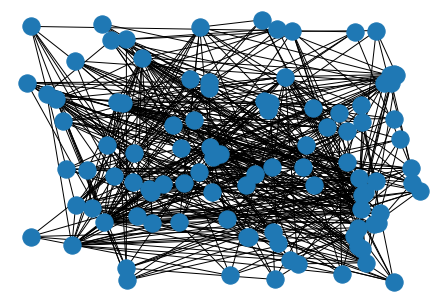

In [2]:
N = 100
m = 5
graph = nx.barabasi_albert_graph(N, m)
# graph = nx.erdos_renyi_graph(N, 0.01)
    
pos = nx.random_layout(graph)
nx.draw(graph, pos=pos)

In [3]:
# initializeing
# total population
N = 100 

I0, R0 = 1, 0
S0 = N - I0 - R0

# 감염률 beta, 회복률 gamma
beta = 0.5
gamma = 0.2

In [4]:
for node in graph.nodes():
    graph.nodes[node]["status"] = "S"

# 초기 감염자 랜덤으로 부여!
first_infected = random.sample(graph.nodes, 1)
for node in first_infected:
    graph.nodes[node]["status"] = "I"
    
# graph.nodes(data=True)

In [5]:
# # node 별 상태 초기화 : dictionary 이용
# status = {}

# for node in graph.nodes():
#     status[node] = "S"

# first_infected = random.sample(graph.nodes, 1)
# for node in first_infected:
#     status[node] = "I"

# nx.set_node_attributes(graph, status, "status")

In [6]:
def SIR_model(graph):
    
    status = nx.get_node_attributes(graph, "status")
    
    # 감염된 노드 찾기
    infected_node = []
    for key, value in status.items():
        if value == "I":
            infected_node.append(key)

    # 감염자 I 중에서 일정 비율을 R로
    for node in infected_node:
        prob = random.random()
        if prob < gamma:
            graph.nodes[node]["status"] = "R"

    # 감염자의 이웃 중 S 들에서 일정비율을 I로  
    for node in infected_node:
        for friend in graph.neighbors(node):
            prob = random.random()
            if graph.nodes[friend]["status"] == "S" and prob < beta:
                graph.nodes[friend]["status"] = "I"
                
    return len(infected_node)

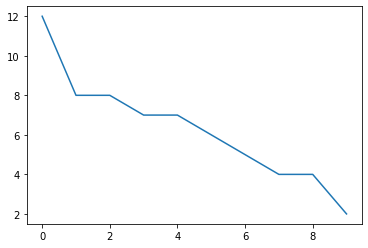

In [9]:
timestamp = 10

infect_ratio = []
for time in range(timestamp):
    I = SIR_model(graph)
    infect_ratio.append(I)

#     nx.draw(graph, pos = pos, node_color=node_color, with_labels=True)
#     plt.show()

plt.plot(infect_ratio)

### example of the using EoN
https://python.plainenglish.io/visualizing-dynamic-phenomena-with-sir-model-and-networks-45a4e629e609

(<AxesSubplot:>,
 [<AxesSubplot:title={'center':'$S$, $I$, $R$'}, xlabel='$t$'>])

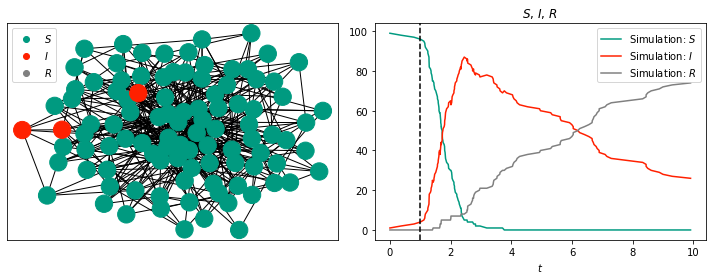

In [12]:
sim = EoN.fast_SIR(graph, tau = beta, gamma=gamma, return_full_data=True, tmax=10)

sim.display(time = 1, ts_plots=['SIR'])

MovieWriter ffmpeg unavailable; using Pillow instead.


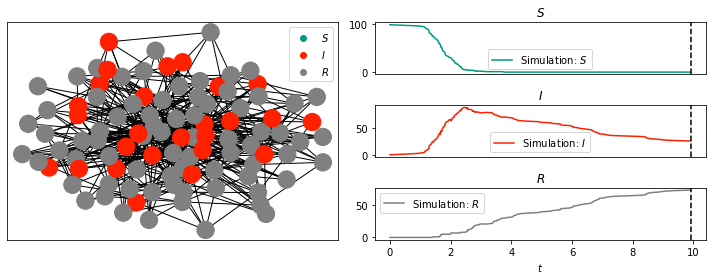

In [14]:
ani = sim.animate()
ani.save("animation.gif", fps=10)


5.999999999999999
doing Gillespie simulation
done with simulation, now plotting


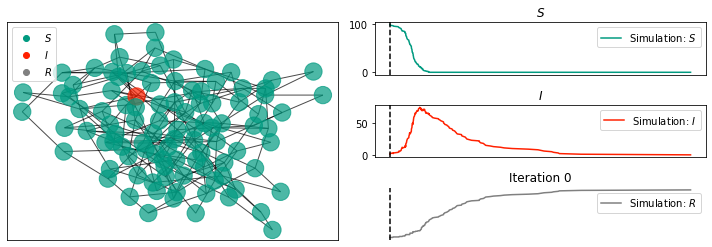

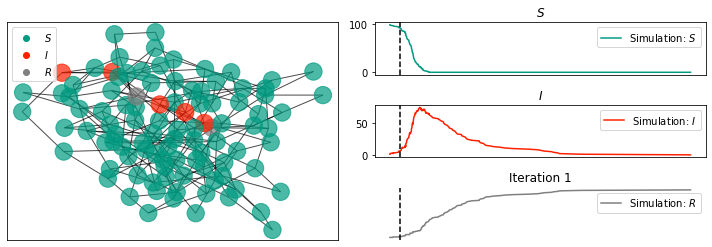

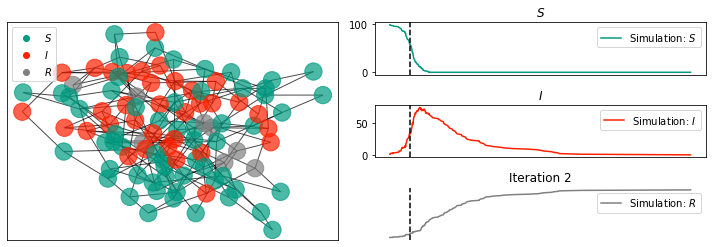

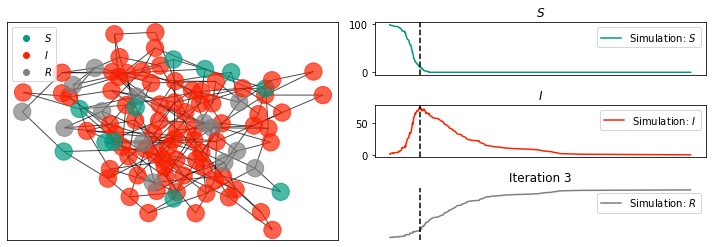

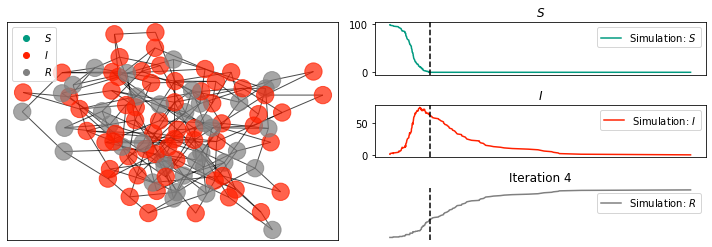

In [15]:
import EoN
gamma = 0.2  
beta = 1.2 
r_0 = beta/gamma
print(r_0)
N = 100 # population size
I0 = 1   # intial n° of infected individuals 
R0 = 0
S0 = N - I0 - R0
pos = nx.spring_layout(g)
nx_kwargs = {"pos": pos, "alpha": 0.7} #optional arguments to be passed on to the
#networkx plotting command.

print("doing Gillespie simulation")
sim = EoN.fast_SIR(g, tau = beta, gamma=gamma, rho = I0/N, return_full_data=True)
print("done with simulation, now plotting")
for i in range(0,5,1):
    sim.display(time = i,  **nx_kwargs)
    plt.axis('off') 
    plt.title("Iteration {}".format(i))
    plt.draw()